#### EDA for Solar Power Generation Dataset

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
file_path = "solarpowergeneration (1).csv"
df = pd.read_csv(file_path)

In [7]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [8]:
#  Basic Information
print("----- BASIC INFO -----")
print(df.info())
print("\n----- SHAPE -----")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n----- COLUMN NAMES -----")
print(df.columns.tolist())

----- BASIC INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB
None

----- SHAPE -----
Rows: 2920, Columns: 10

----- COLUMN NAMES -----
['distance-to-solar-noon', 'temperature', 'wind-

In [9]:
# Rename columns for easy access
df.columns = [col.strip().lower().replace("-", "_").replace("(", "").replace(")", "") for col in df.columns]

In [10]:
# Descriptive Statistics
print("\n----- SUMMARY STATISTICS -----")
print(df.describe().T)


----- SUMMARY STATISTICS -----
                            count         mean           std        min  \
distance_to_solar_noon     2920.0     0.503294      0.298024   0.050401   
temperature                2920.0    58.468493      6.841200  42.000000   
wind_direction             2920.0    24.953425      6.915178   1.000000   
wind_speed                 2920.0    10.096986      4.838185   1.100000   
sky_cover                  2920.0     1.987671      1.411978   0.000000   
visibility                 2920.0     9.557705      1.383884   0.000000   
humidity                   2920.0    73.513699     15.077139  14.000000   
average_wind_speed_period  2919.0    10.129154      7.261547   0.000000   
average_pressure_period    2920.0    30.017760      0.142006  29.480000   
power_generated            2920.0  6979.846233  10312.336413   0.000000   

                                 25%         50%           75%           max  
distance_to_solar_noon      0.243714    0.478957      0.739528 

In [11]:
# 3️⃣ Missing Values & Duplicates
print("\n----- MISSING VALUES -----")
print(df.isnull().sum())

print("\n----- DUPLICATE ROWS -----")
print(df.duplicated().sum())


----- MISSING VALUES -----
distance_to_solar_noon       0
temperature                  0
wind_direction               0
wind_speed                   0
sky_cover                    0
visibility                   0
humidity                     0
average_wind_speed_period    1
average_pressure_period      0
power_generated              0
dtype: int64

----- DUPLICATE ROWS -----
0


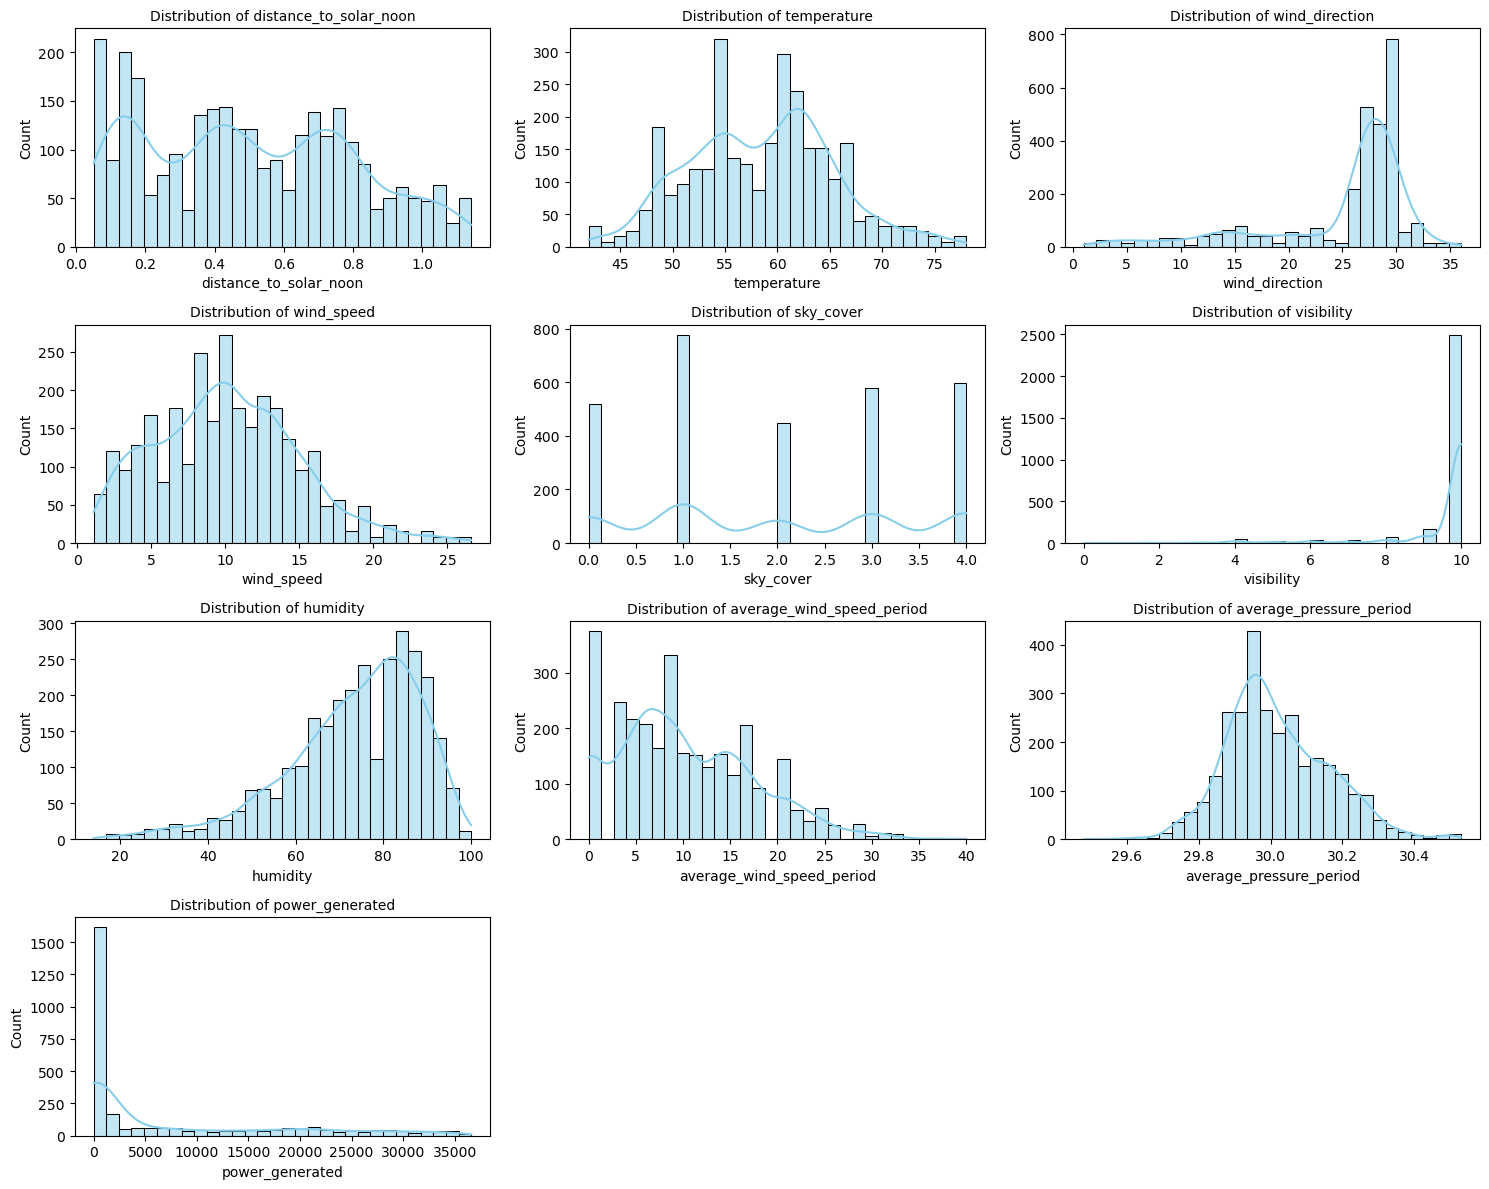

In [12]:
# Univariate Analysis

num_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=10)
plt.tight_layout()
plt.show()

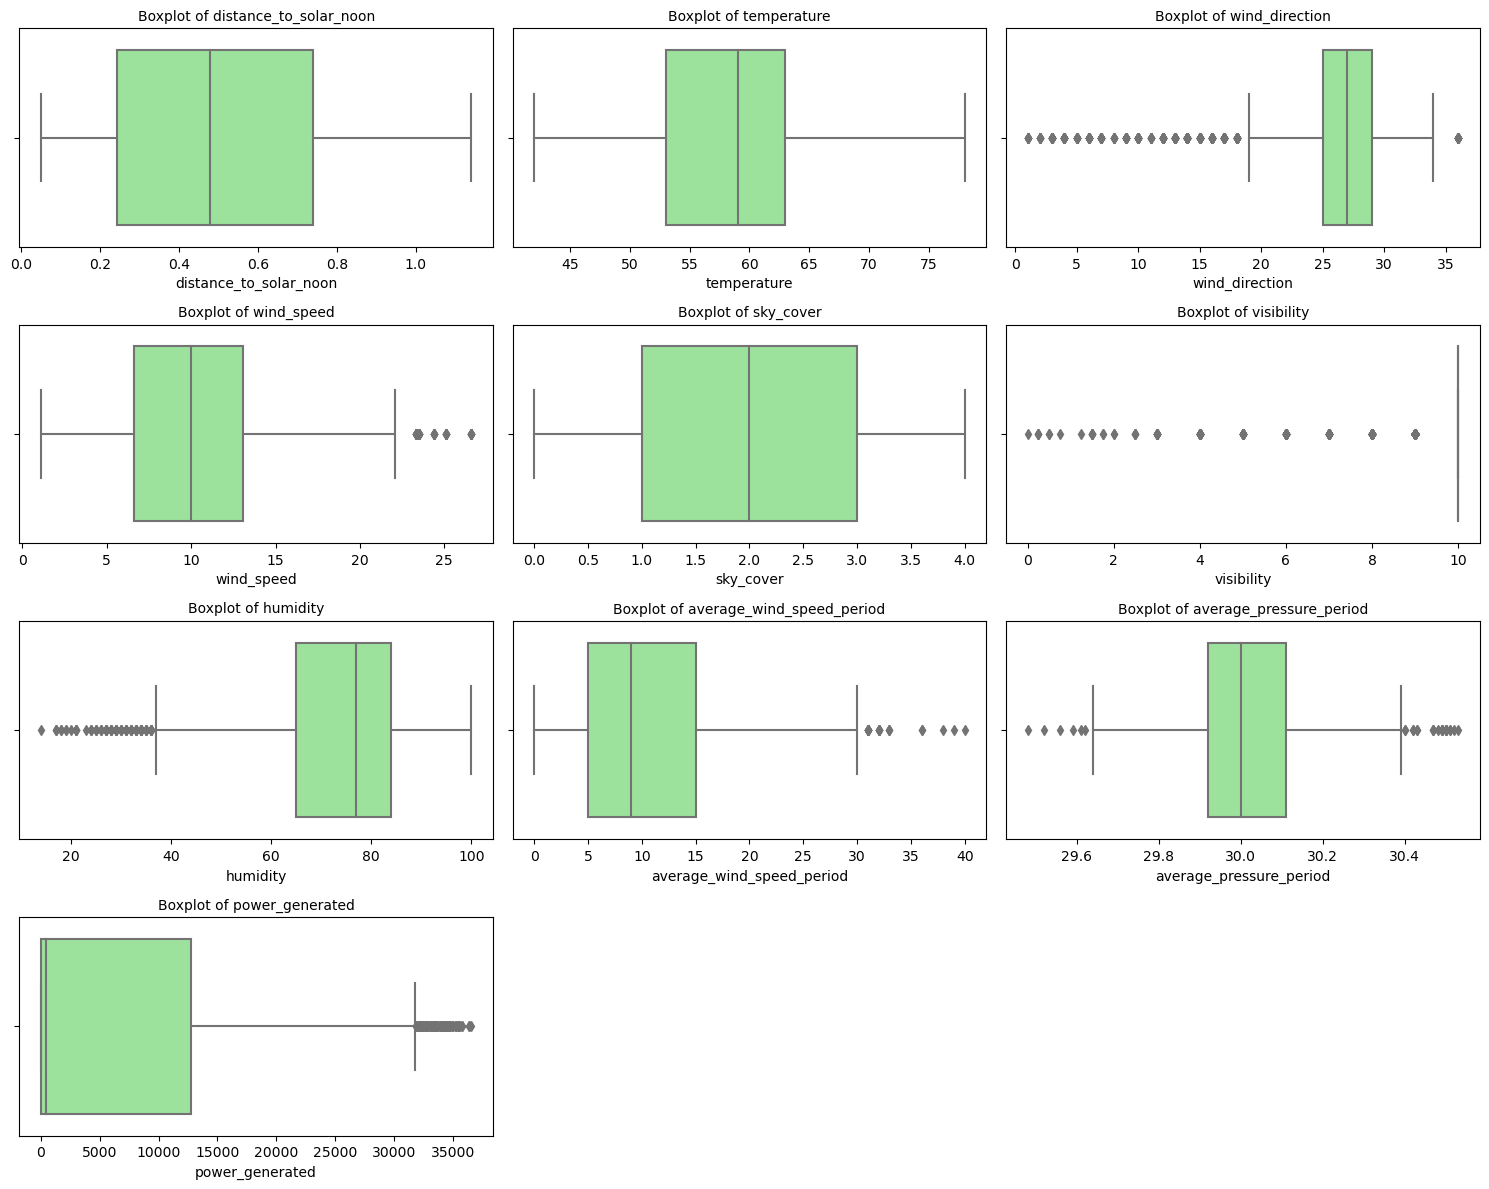

In [13]:
#  Outlier Detection using Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\bincy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


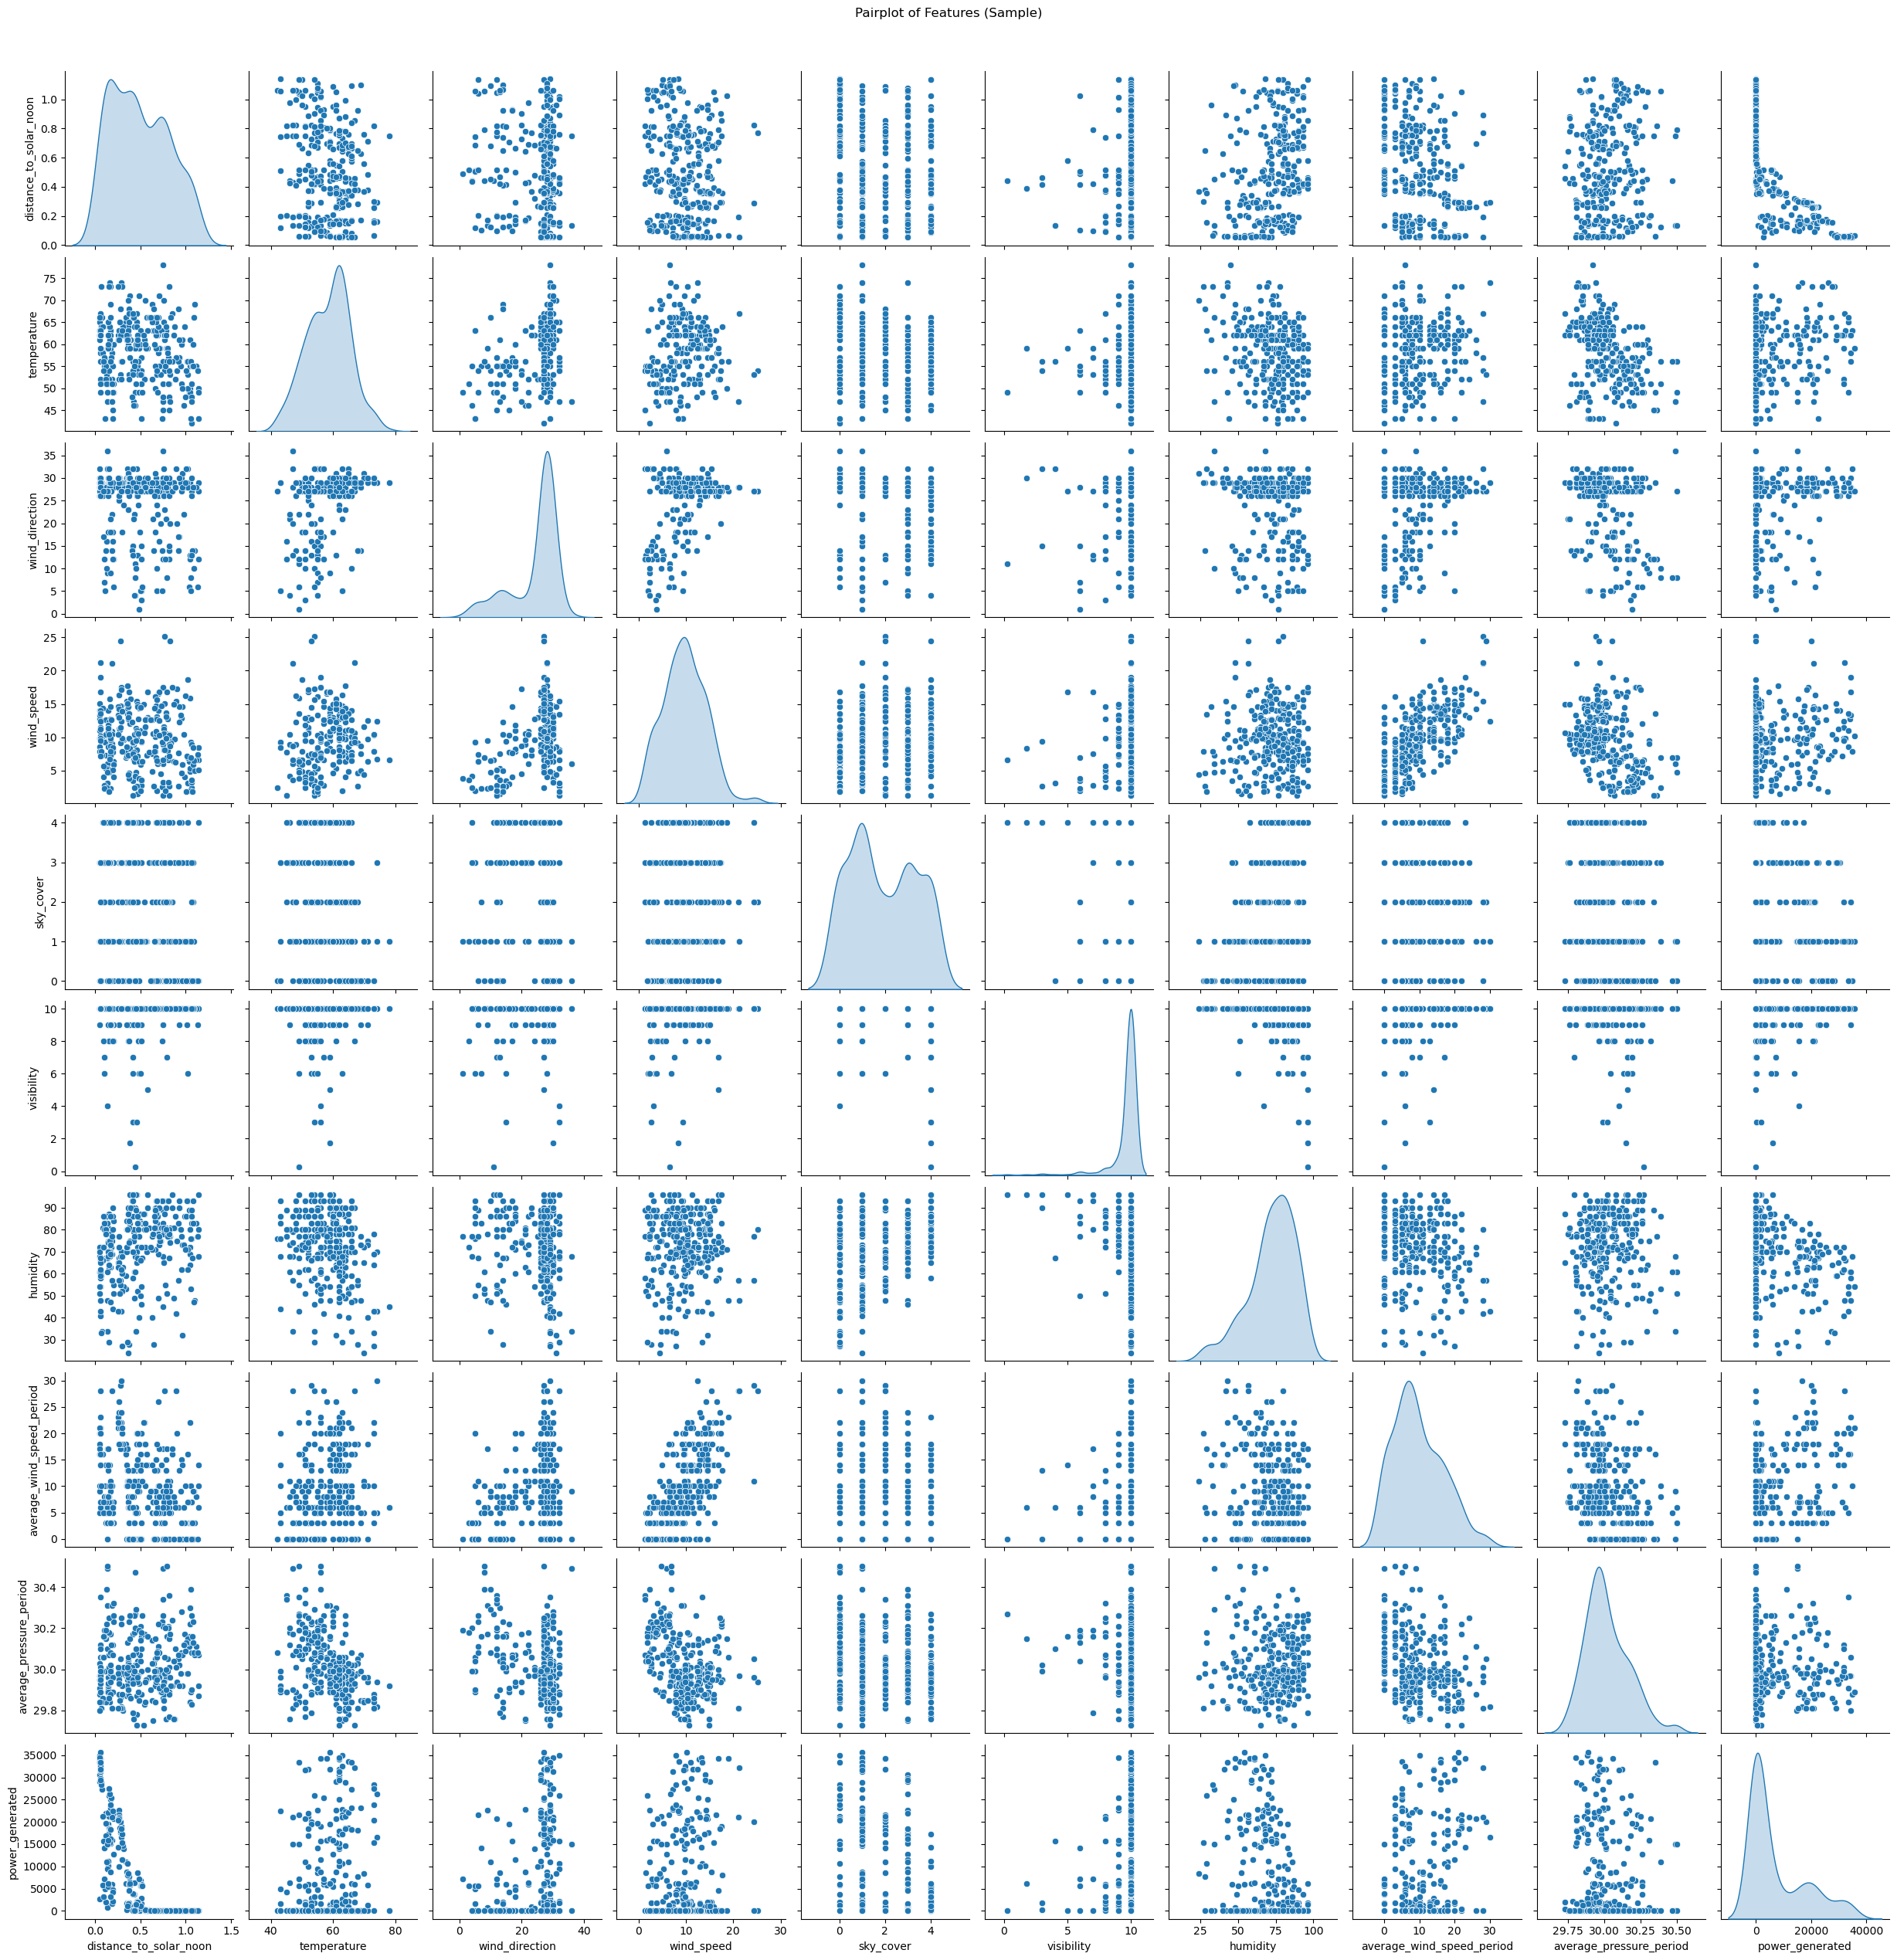

In [14]:
# Pairplot to See Relationships
sns.pairplot(df.sample(300), diag_kind='kde')
plt.suptitle("Pairplot of Features (Sample)", y=1.02)
plt.show()

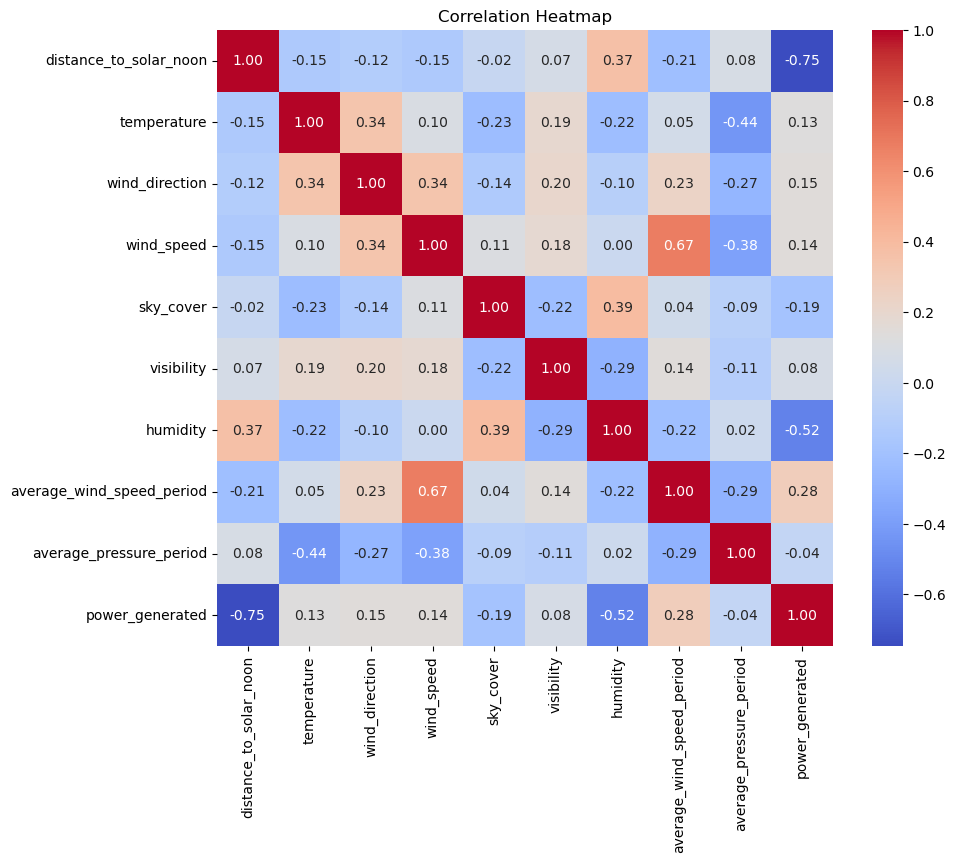

In [15]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# Strong correlations with target
target_corr = corr["power_generated"].sort_values(ascending=False)
print("\n----- CORRELATION WITH TARGET (power_generated) -----")
print(target_corr)


----- CORRELATION WITH TARGET (power_generated) -----
power_generated              1.000000
average_wind_speed_period    0.278174
wind_direction               0.146788
wind_speed                   0.142641
temperature                  0.132193
visibility                   0.076536
average_pressure_period     -0.036771
sky_cover                   -0.187236
humidity                    -0.522545
distance_to_solar_noon      -0.746681
Name: power_generated, dtype: float64


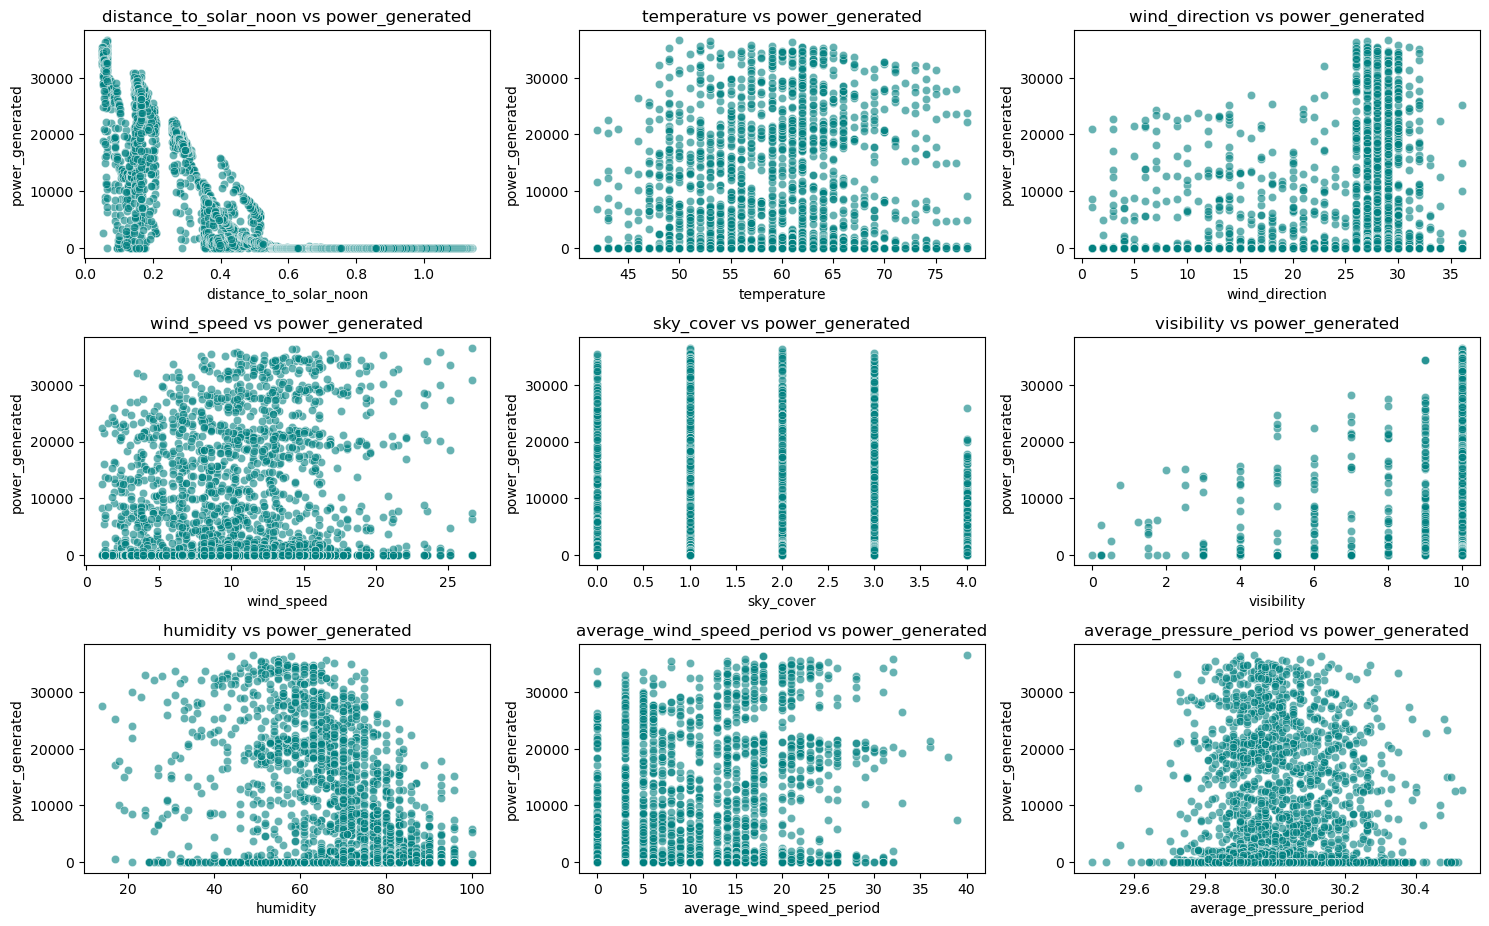

In [17]:
#  Bivariate Analysis with Target
target = 'power_generated'

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features.drop(target), 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x=col, y=target, color='teal', alpha=0.6)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

In [18]:
# Insights Summary
print("----- INSIGHTS -----")
print("""
'distance_to_solar_noon' likely shows a sinusoidal pattern affecting energy generation.
'temperature' and 'humidity' may have moderate influence on power output.
'sky_cover' (cloudiness) negatively affects energy production.
Wind-related variables (wind_speed, average_wind_speed_period) show mild correlation.
No major missing data; outliers may exist in 'power_generated' due to environmental spikes.
Data suitable for regression modeling after normalization or feature scaling.
""")

----- INSIGHTS -----

'distance_to_solar_noon' likely shows a sinusoidal pattern affecting energy generation.
'temperature' and 'humidity' may have moderate influence on power output.
'sky_cover' (cloudiness) negatively affects energy production.
Wind-related variables (wind_speed, average_wind_speed_period) show mild correlation.
No major missing data; outliers may exist in 'power_generated' due to environmental spikes.
Data suitable for regression modeling after normalization or feature scaling.



### MODEL BUILDING

In [26]:
# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

#### Handle missing values

In [27]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

#### TRAIN–TEST SPLIT + SCALING

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### DEFINE ALL MODELS

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.01),
    "SVR": SVR(kernel="rbf"),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

#### MODEL EVALUATION FUNCTION

In [30]:
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    
    return mae, mse, rmse, r2

#### TRAIN ALL MODELS + STORE RESULTS

In [31]:
results = {}

for name, model in models.items():
    print(f" Training {name}...")
    
    # Scaled models
    if name in ["Linear Regression", "Lasso Regression", "SVR"]:
        model.fit(X_train_scaled, y_train)
        metrics = evaluate_model(model, X_test_scaled, y_test)
    else:
        # Tree models don't need scaling
        model.fit(X_train, y_train)
        metrics = evaluate_model(model, X_test, y_test)

    results[name] = metrics


 Training Linear Regression...
 Training Lasso Regression...
 Training SVR...
 Training Random Forest...
 Training Gradient Boosting...
 Training XGBoost...


In [32]:
#### COMPARE ALL MODELS

In [33]:
results_df = pd.DataFrame(
    results,
    index=["MAE", "MSE", "RMSE", "R²"]
).T

results_df


,MAE,MSE,RMSE,R²
Linear Regression,4981.154256,3.949494e+07,6284.499607,0.625062
Lasso Regression,4981.155195,3.949493e+07,6284.499200,0.625062
SVR,6776.226479,1.454182e+08,12058.946249,-0.380503
Random Forest,1547.110462,1.147725e+07,3387.809154,0.891043
Gradient Boosting,1677.601588,1.042584e+07,3228.907693,0.901024
XGBoost,1596.381405,9.450999e+06,3074.247644,0.910279


#### CROSS-VALIDATION

In [35]:
cv_scores = {}

for name, model in models.items():
    if name in ["Linear Regression", "Lasso Regression", "SVR"]:
        score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
    else:
        score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    
    cv_scores[name] = score

cv_df = pd.DataFrame(cv_scores)
cv_df


,Linear Regression,Lasso Regression,SVR,Random Forest,Gradient Boosting,XGBoost
0,0.645428,0.645428,-0.368233,0.909750,0.908339,0.910455
1,0.644321,0.644321,-0.372403,0.900542,0.901188,0.900816
2,0.629232,0.629232,-0.354244,0.907029,0.905712,0.910807
3,0.684344,0.684344,-0.447760,0.914832,0.921512,0.923354
4,0.647057,0.647057,-0.430330,0.913631,0.919385,0.914817


#### RESIDUAL PLOTS

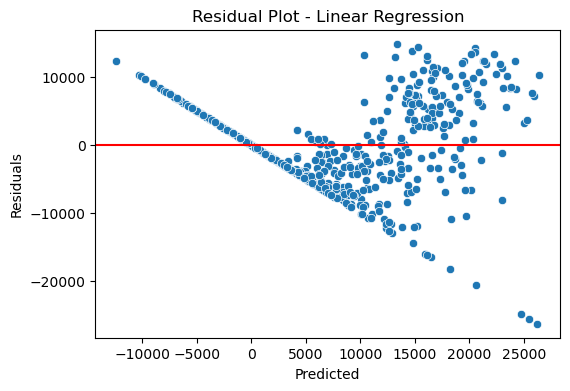

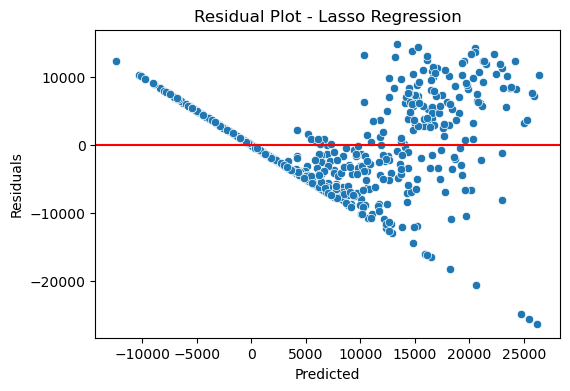

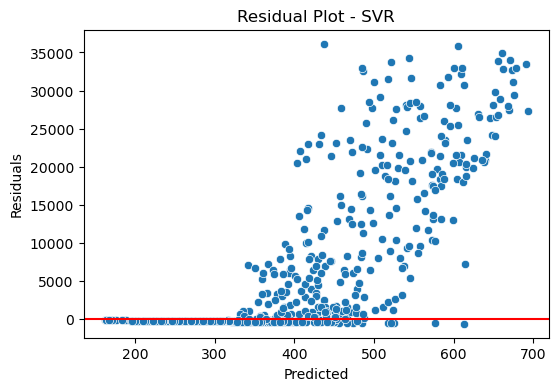

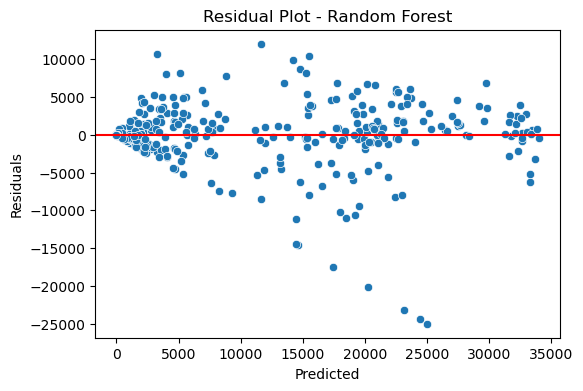

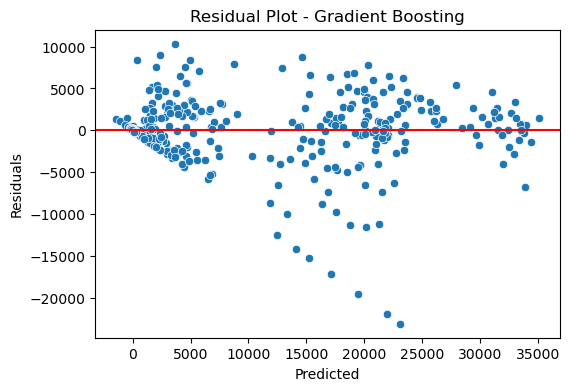

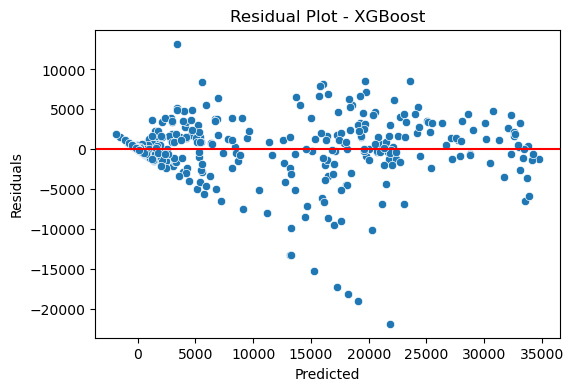

In [37]:
for name, model in models.items():
    plt.figure(figsize=(6,4))

    if name in ["Linear Regression", "Lasso Regression", "SVR"]:
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)

    residuals = y_test - preds

    sns.scatterplot(x=preds, y=residuals)
    plt.axhline(0, color='red')
    plt.title(f"Residual Plot - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()


#### FEATURE IMPORTANCE (TREE MODELS)

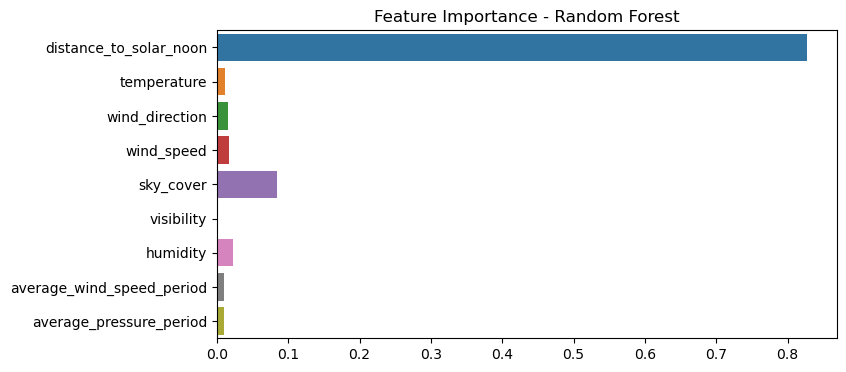

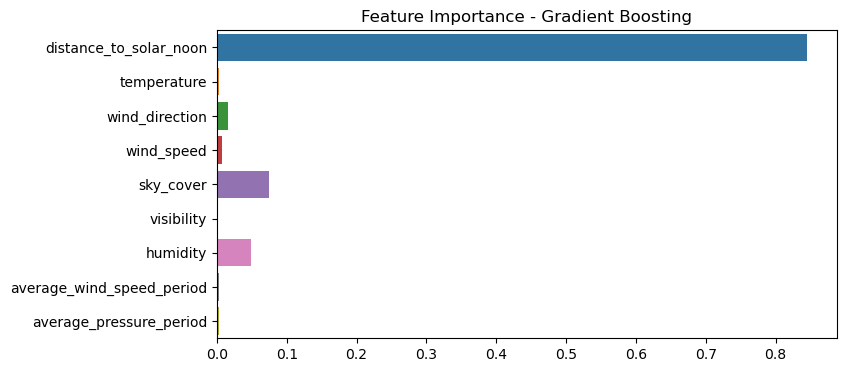

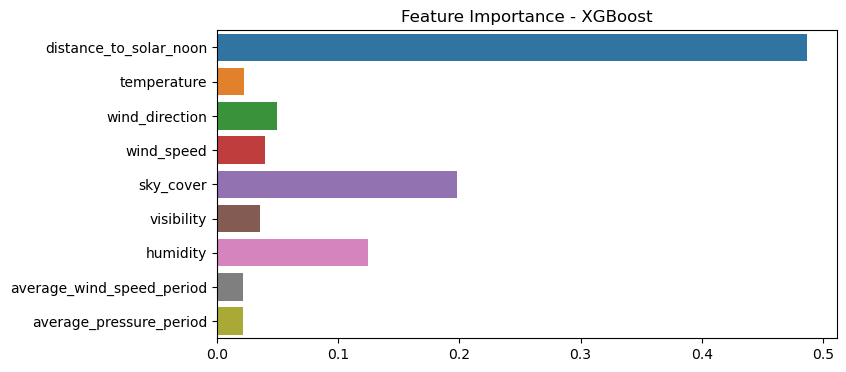

In [38]:
tree_models = ["Random Forest", "Gradient Boosting", "XGBoost"]

for name in tree_models:
    model = models[name]
    importance = model.feature_importances_

    plt.figure(figsize=(8,4))
    sns.barplot(x=importance, y=X.columns)
    plt.title(f"Feature Importance - {name}")
    plt.show()


#### BEST MODEL IDENTIFICATION

In [39]:
best_model_name = results_df["R²"].idxmax()
best_model_score = results_df["R²"].max()

print("=================================================")
print(f" BEST MODEL: {best_model_name}")
print(f" R² Score: {best_model_score}")
print("=================================================")


 BEST MODEL: XGBoost
 R² Score: 0.9102785477952983


#### Show Accuracy (R² Score) of Each Model

In [40]:
print("\nModel Accuracy (R² Score):")
print("====================================")

for name, model in models.items():
    
    # Scaled models
    if name in ["Linear Regression", "Lasso Regression", "SVR"]:
        r2 = r2_score(y_test, model.predict(X_test_scaled))
    else:
        r2 = r2_score(y_test, model.predict(X_test))
    
    print(f"{name}: {r2:.4f}")


Model Accuracy (R² Score):
Linear Regression: 0.6251
Lasso Regression: 0.6251
SVR: -0.3805
Random Forest: 0.8910
Gradient Boosting: 0.9010
XGBoost: 0.9103
